### Нахождение корней нелинейного уравнения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

***

$$f(x) = 0$$
$$|f(x)| \leq \epsilon$$
* Заданы: f, eps

#### Локализация корней:
1. Графически
2. Табличный: f(a) * f(b) <= 0 - функция непрерывна и монотонна

***

### Постановка задачи

<u>Цель</u>: найти корни уравнения f(x) = 0 методом релаксации

<u>Исходные данные</u>: f(x) - непрерывная, имеющая непрерывные производные до второго порядка функция.

<u>Модельные представления</u>: уравнение может иметь один или несколько вещественных или комплексных, простых или кратных корней, или не иметь ни одного.

<u>Критерий оценки результата</u>: $ |f(x)| \leq \epsilon $

($ \epsilon $ - заданная абсолютная погрешность вычислений)

***

1. Локализовать один из вещественных корней уравнения $ f(x) = 0 $ для
$$ f(x) = x^2 + 4\sin{x} - 1 $$

In [2]:
# Определение функции f(x)

def f(x):
    return x**2 + 4 * np.sin(x) - 1

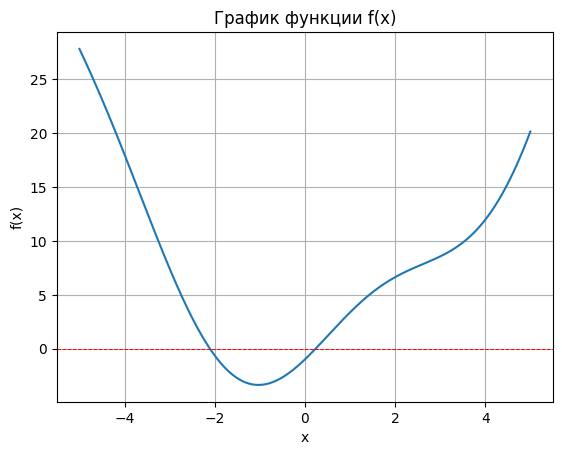

In [3]:
# Построение графика функции

x = np.linspace(-5, 5, 400)
y = f(x)

plt.plot(x, y)
plt.axhline(0, color='r', linestyle='--', lw=0.7)  # Горизонтальная линия y=0 для наглядности
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Функция пересекает ось X в двух точках, примерно на интервалах (-2.5, -2) и (0, 0.5).

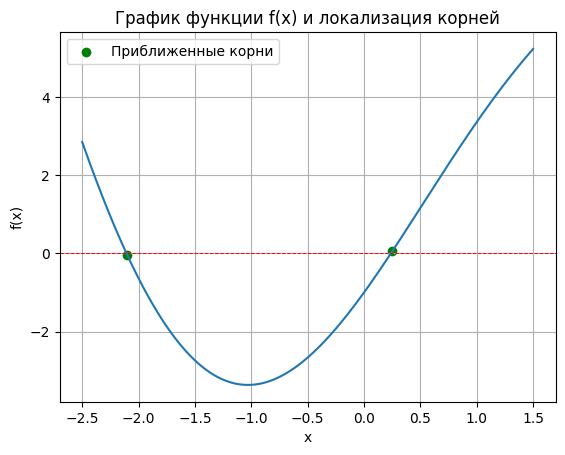

In [4]:
x = np.linspace(-2.5, 1.5, 600)  # Расширим интервал для лучшей визуализации
y = f(x)

plt.plot(x, y)
plt.axhline(0, color='r', linestyle='--', lw=0.7)  # Горизонтальная линия y=0 для наглядности

# Отметим интересующие нас точки на графике
roots_approximations = [-2.1, 0.25]  # Приближенные корни
plt.scatter(roots_approximations, [f(x) for x in roots_approximations], color='g', marker='o', label='Приближенные корни')
plt.legend()
plt.title('График функции f(x) и локализация корней')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Локализуем корни табличным способом:

In [5]:
# Создание таблицы значений функции около приближенных корней
table_data = {'x1': [], 'f(x1)': [], 'x2': [], 'f(x2)': []}
for i, root in enumerate(roots_approximations):
    x_values = np.linspace(root - 0.5, root + 0.5, 11)
    y_values = [f(x) for x in x_values]
    table_data[f'x{i+1}'] = x_values
    table_data[f'f(x{i+1})'] = y_values

df = pd.DataFrame(table_data)

pd.options.display.float_format = '{:.3f}'.format

# Вывод таблицы
display(df)

,x1,f(x1),x2,f(x2)
0,-2.600,3.698,-0.250,-1.927
1,-2.500,2.856,-0.150,-1.575
2,-2.400,2.058,-0.050,-1.197
3,-2.300,1.307,0.050,-0.798
4,-2.200,0.606,0.150,-0.380
5,-2.100,-0.043,0.250,0.052
6,-2.000,-0.637,0.350,0.494
7,-1.900,-1.175,0.450,0.942
8,-1.800,-1.655,0.550,1.393
9,-1.700,-2.077,0.650,1.843


***

2. Определить корни с точностью $ \epsilon = 10^{-7} $ методом простых итераций с выбором релаксационного параметра.

In [68]:
# Определение функции итерации

def phi(x, w):
    return x - w * f(x)

def iteration_method(precision, initial_guess, w):
    x_prev = initial_guess
    x_next = phi(x_prev, w)
    iterations = 1

    while abs(x_next - x_prev) > precision:
        if (iterations > 30): break
        x_prev = x_next
        x_next = phi(x_prev, w)
        iterations += 1

    return x_next, iterations

Чтобы определить оптимальное значение релаксационного параметра w найдём максимальное и минимальное значение $ f^{'}(x) $ на отрезке (0, 0.5):

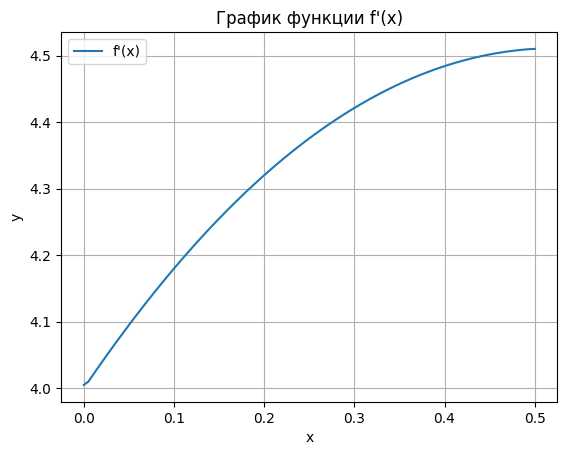

In [77]:
x = np.linspace(0, 0.5, 100)
y = x

plt.plot(x, np.gradient(f(x), x), label="f'(x)")

plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции f\'(x)')
plt.legend()
plt.grid(True)
plt.show()

$ m \approx 4.01 $, $ M \approx 4.52 $.

Для нахождения оптимального параметра w воспользуемся формулой:

$$ \omega = \frac{2}{m + M} $$

В результате получили w = 0.23

In [80]:
precision = 1e-7
initial_guess = 0.25
w = 0.23

root, num_iterations = iteration_method(precision, initial_guess, w)
error = abs(f(root))
print("Корень: ", round(root, 5))

Корень:  0.23807


***

3. Напечатать значение $ |f(x)| $ для полученного приближённого значения корня и число выполненных итераций.

In [81]:
print("|f(x)|: ", round(error, 16))
print("Число итераций: ", num_iterations)

|f(x)|:  1.17406e-11
Число итераций:  4


***

## Контрольные вопросы:

7. Докажите утверждение: сжимающее отображение может иметь только одну неподвижную точку.

По определению, отображение сжимающее, если выполняется условие

$$ p \big( \phi(u_1), \phi(u_2) \big) \leq q * p \big( u_1, u_2 \big), \ 0 < q < 1 $$

Теперь предположим, что у нас есть две неподвижные точки для этого сжимающего отображения $\phi$, то есть точки a и b, такие что $ \phi(a) = a \ и \ \phi(b) = b $. Пойдём от противного, предположим что $ a \ne b $. Тогда по определению сжимающего отображения:

$$ p \big( \phi(a), \phi(b) \big) \leq q * p (a, b) $$

Но так как $ \phi(a) = a \ и \ \phi(b) = b $, это уравнение становится:

$$ p(a, b) \leq q * p(a, b) $$

Известно, что 0 < q < 1. Тогда правая часть уравнения всегда будет меньше левой части, за исключением случая, когда p(a, b) = 0. Из этого следует, что p(a, b) = 0, в противном случае это нарушило бы неравенство. А p(a, b) = 0 может быть только в том случае, когда a = b.

Следовательно, у сжимающего отображения может быть только одна неподвижная точка.

***

14.	В чем преимущества и недостатки метода половинного деления для решения нелинейного уравнения?

Метод бисекций имеет несколько преимуществ:
* Простота реализации - это один из самых простых численных методов для решения уравнений. И на практике часто используется в гибридных алгоритмах.
* Гарантированная сходимость - при условии непрерывности и изменения знака на концах отрезка, в котором ищется корень.

Но у этого метода целый ряд недостатков и ограничений:
* Имеет линейную скорость сходимости (то есть, число верных знаков в приближении удваивается с каждой итерацией), что является очень медленным методом в случае множества корней или близости корня к начальному приближению.
* Необходимость знания начального интервала.
* Не применим к уравнениям без изменения знака (где знак функции не меняется на интервале, в котором ищется корень).
* Неэффективен для уравнений с множеством корней - так как метод находит только один корень.

***

15.	Укажите условие, при котором отображение, заданное на некотором отрезке непрерывной дифференцируемой функцией, является сжимающим на этом отрезке. Поясните ответ.

Отображение, заданное на некотором отрезке непрерывной дифференцируемой функцией, будет сжимающим на этом отрезке, если выполняется условие Липшица.

Условие Липшица для функции f(x) на отрезке [a, b] означает, что существует константа L такая, что для всех $ x_1 \ и \ x_2 $ в этом отрезке выполняется следующее неравенство:

$$ |f(x_1) - f(x_2)| \leq L |x_1 - x_2| $$

Это неравенство означает, что разница между значениями функции f(x) в точках $ x_1 \ и \ x_2 $ ограничена константой L умноженной на расстояние между этими точками $ |x_1 - x_2| $. Если такая константа L существует и она меньше единицы (L<1), то отображение f(x) считается сжимающим на отрезке [a, b].

В нашей задаче под константу L подходит значение производной $ \phi^{'}(x) $. И тогда отображение на отрезке будет сжимающим при условии $ \phi^{'}(x) < 1 $. 

Пояснение:

* Когда функция удовлетворяет условию Липшица с L<1, это означает, что изменение значений функции ограничено, и отображение сжимает значения внутри отрезка.
* Методы сжатия, такие как метод половинного деления (бисекции) и метод Ньютона, используют это свойство для нахождения корней уравнений.
* Условие Липшица гарантирует, что итерационный процесс сжатия будет сходиться к единственной неподвижной точке (корню) функции на отрезке.

***

20.	Графически проиллюстрируйте сходящийся процесс метода простых итераций для решения нелинейного уравнения $ x = \phi (x) $ в случае, когда $ \phi^{'} (x) < 0 $ и укажите порядок сходимости этого метода.

![Alt text](image.png)

1. Строится график функции $y = \phi(x)$.
2. Точка пересечения графика функции $y = \phi(x)$ и линии $y = x$.
3. Задаётся начальное приближение $x_0$ и строится отрезок, соединяющий точку $(x_0, 0)$ и точку на графике функции $y = \phi(x)$, соответствующую $x = x_0$. Этот отрезок будет представлять первую итерацию метода. И данный процесс будет повторяться до точки выхода.

Порядок сходимости метода простых итераций можно определить, исследуя производную функции $\phi(x)$ в окрестности корня. Если $|\phi^{'}(x)| < 1$ в этой окрестности, то метод сходится с линейной скоростью. Если $|\phi'(x)| > 1$, то метод может сходиться нелинейно или разойтись. Если $|\phi'(x)| = 0$, то метод может сходиться с квадратичной скоростью (суперсходимость).

В случае, когда $\phi'(x) < 0$, метод простых итераций будет сходиться с линейной скоростью, так как модуль производной будет меньше 1. Порядок сходимости этого метода будет равен 1.

***

24. Укажите интервал для выбора релаксационного параметра в методе релаксаций в случае $ F^{'} (x) > 0 $. Ответ обосновать.

Значение параметра релаксации находится в диапозоне $ 0 < \omega < 2 $. 

Если $ \omega = 1 $, то получится метод Зейделя.

Если $ 1 < \omega < 2 $, то это называется методом последовательной верхней релаксации (SOR). 

Если $ 0 < \omega < 1 $, то это называется методом нижней релаксации.

Чтобы подобрать параметр релоксации $ \omega $ так, чтобы выполнялось условие сходимости функции $ \phi(x) = x - kf(x) $:

$$\begin{cases}
    \omega \in (0, 2/M), f^{'}(x) > 0
    \\
    \omega \in (2/M, 0), f^{'}(x) < 0
\end{cases}$$

Здесь $ m \leq f^{'}(x) \leq M $ на отрезке локализации [a, b], где m и M - минимальное и максимальное значение $ f^{'}(x) $.

Оптимальным значением релаксационного параметра является $ \omega = \frac{2}{m+M} $